# Notebook Title

`Put your identity below`

#### Nama : ALEXANDER GREATEINE TANAKU
#### Batch : FTDS - 014

## Description

Saya adalah seorang data scientist yang bekerja untuk elite 4 untuk membuat komposisi team pokemon yang ideal agar dapat menghalangi karakter utama untuk menyelesaikan game.

### Objective

Membuat 1 komposisi team Pokemon untuk Elite 4 untuk dipakai bos elite 4


### Problem Statement
Membuat Team yang terkuat untuk dipakai final boss yaitu elite 4 untuk menghalangi lajunya karakter utama
Berikut adalah aturan dalam membuat team

1. Maks hanya boleh 1 pokemon legendary
2. di dalam 1 team harus ada pokemon dual type dan single type
3. Komposisi team terdiri dari 6 pokemon

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

In [1]:
import pandas as pd
import numpy as np

### TAHAP 1 : Research Jenis Pokemon yang terkuat berdasar single type dan dual Type

In [2]:
# Membaca Data pokemon
df = pd.read_csv('pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
# Mengganti nama column yang memiliki spasi
df.rename(columns = {'Type 1':'Type_1', 'Type 2':'Type_2'}, inplace = True)

In [4]:
# Menghapus Kolom '#' karena sudah ada indexnya
del df['#']

In [5]:
# Mengecheck missing Values
df.isnull().sum()

Name            0
Type_1          0
Type_2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Terdapat 386 missing values pada kolom type 2 dan 386 merupakan hampir setengah dari dataset,  saya memutuskan untuk membuat kolom baru untuk mengelompokkan pokemon yang memiliki 2 tipe dan pokemon yang memiliki 1 tipe. Saya juga akan memasukkan type 1 ke kolom type 2 jika value dari type 2 adalah null


In [6]:
#Handling missing Values, mengubah NaN menjadi string None
df.Type_2.fillna('None', inplace = True)

In [7]:
df

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [8]:
# Mengecheck apakah masih ada missing value
df.isnull().sum()

Name          0
Type_1        0
Type_2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [9]:
df_tipe_1 = df.groupby(by = 'Type_2').mean()
df_tipe_1.sort_values(by = 'Total', ascending = False)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type_2,,,,,,,,,
Dragon,526.166667,82.166667,94.444444,87.055556,98.500000,83.444444,80.555556,4.166667,0.222222
Fighting,525.846154,79.461538,112.846154,82.500000,81.269231,82.384615,87.384615,3.923077,0.153846
Ice,525.714286,90.000000,98.000000,85.642857,92.642857,84.785714,74.642857,3.714286,0.214286
Fire,506.250000,71.250000,81.250000,80.166667,110.416667,83.500000,79.666667,4.000000,0.250000
Steel,485.227273,64.636364,92.590909,104.636364,77.727273,86.272727,59.363636,3.818182,0.045455
Dark,484.400000,75.550000,109.800000,72.050000,81.800000,69.850000,75.350000,3.750000,0.050000
Psychic,479.060606,72.212121,74.696970,87.030303,88.030303,87.606061,69.484848,2.939394,0.151515
Electric,455.333333,88.166667,72.666667,68.333333,81.166667,73.500000,71.500000,4.000000,0.166667
Flying,452.546392,71.391753,80.288660,68.309278,75.628866,71.206186,85.721649,3.072165,0.134021


In [10]:
# Membuat fungsi untuk check apakah pokemon memiliki satu atau dua tipe
kolom = []

def satu_dua(data2):
    if data2 == 'None':
        return 'One'
    elif 'None' not in data2:
        return 'Two'

In [11]:
# Membuat Looping dan memasukkan fungsi untuk setiap kolom agar dicheck apakah pokemon punya satu atau dua tipe
keterangan = []

for idx in range(len(df)):
    res = satu_dua(df.loc[idx, 'Type_2'])
    keterangan.append(res)

df['Banyak_Jenis'] = keterangan

In [38]:
df

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Banyak_Jenis
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Two
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Two
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Two
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Two
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Two
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,Two
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Two
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,Two


In [12]:
# Menganalisa apakah lebih kuat pokemon dengan satu jenis atau dua jenis
df.groupby(by = 'Banyak_Jenis').mean()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Banyak_Jenis,,,,,,,,,
One,412.015544,67.766839,74.525907,67.585492,68.284974,67.974093,65.878238,3.230570,0.064767
Two,456.628019,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493,3.410628,0.096618


Berdasarkan analisa data, pokemon dengan tipe 2 memiliki rata2 yang lebih tinggi di semua kategori mulai dari HP sampai Speed. maka diputuskan agar komposisi team memakai lebih banyak pokemon dengan 2 tipe dibandingkan dengan pokemon satu tipe

In [13]:
# Menganalisa Seberapa kuat pokemon legendary dibanding pokemon biasa
Legendary = df.groupby(by = 'Legendary').mean()
Legendary

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Legendary,,,,,,,,
False,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
True,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231


<AxesSubplot:ylabel='Legendary'>

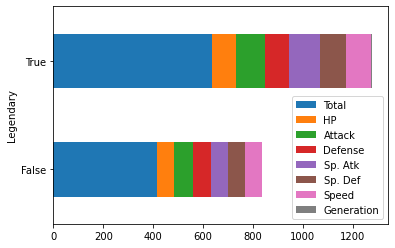

In [14]:
# Membuat plot pokemon legendary dan pokemon biasa
Legendary.plot(kind = 'barh', stacked = True)

In [15]:
# Menghitung seberapa persen lebih kuat pokemon legendary dan pokemon biasa
x = Legendary.loc[1,'Total'] 
y = Legendary.loc[0,'Total']

y/(x+y)*100

39.56137960436596

Berdasarkan data dan grafik, pokemon legendary memiliki stats yang 39 % lebih kuat dari pokemon biasa.

In [16]:
# Membuat dataset pokemon tanpa pokemon legendary dan hanya memiliki satu jenis Type
df_onetype_nolegend = df[df.Legendary == False]
df_onetype_nolegend = df_onetype_nolegend.query("Banyak_Jenis == 'One'").reset_index().drop('index', axis=1)

In [17]:
df_onetype_nolegend

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Banyak_Jenis
0,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,One
1,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False,One
2,Squirtle,Water,None,314,44,48,65,50,64,43,1,False,One
3,Wartortle,Water,None,405,59,63,80,65,80,58,1,False,One
4,Blastoise,Water,None,530,79,83,100,85,105,78,1,False,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Goomy,Dragon,None,300,45,50,35,55,75,40,6,False,One
357,Sliggoo,Dragon,None,452,68,75,53,83,113,60,6,False,One
358,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False,One
359,Bergmite,Ice,None,304,55,69,85,32,35,28,6,False,One


In [18]:
# Mencari tipe pokemon yang terkuat
Type1 = df_onetype_nolegend.groupby(by = 'Type_1').mean().sort_values(by = 'Total', ascending = False)
Type1

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type_1,,,,,,,,,
Steel,472.500000,57.500000,93.750000,127.500000,61.250000,77.500000,55.000000,4.500000,0.0
Ice,434.416667,66.916667,78.000000,78.250000,78.000000,72.583333,60.666667,4.583333,0.0
Ghost,429.600000,49.300000,76.500000,88.000000,73.400000,89.400000,53.000000,3.500000,0.0
Dark,418.000000,59.444444,88.666667,58.000000,75.333333,58.555556,78.000000,3.777778,0.0
Psychic,415.620690,72.931034,48.551724,61.034483,89.551724,79.172414,64.379310,3.482759,0.0
Dragon,413.363636,61.818182,92.181818,67.090909,59.818182,71.636364,60.818182,4.181818,0.0
Electric,407.153846,58.846154,68.615385,54.538462,76.730769,65.076923,83.346154,2.923077,0.0
Fire,406.000000,60.777778,77.074074,57.407407,74.296296,65.037037,71.407407,2.814815,0.0
Water,399.839286,65.071429,69.875000,67.642857,69.357143,61.107143,66.785714,2.875000,0.0


<AxesSubplot:xlabel='Type_1'>

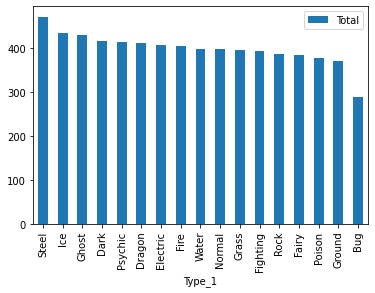

In [19]:
# Memvisualisasikan Kekuatan tipe pokemon
Type1.plot(kind = 'bar', y = 'Total',use_index = True)

##### Pokemon yang hanya memiliki satu tipe terkuat adalah steel

In [20]:
# Mencari Pokemon dengan dua tipe terkuat tanpa pokemon legendary
df_twotype_nolegend = df[df.Legendary == False]
df_twotype_nolegend = df_twotype_nolegend.query("Banyak_Jenis == 'Two'").reset_index().drop('index', axis=1)
df_twotype_nolegend

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Banyak_Jenis
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Two
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Two
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Two
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Two
4,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Two
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False,Two
370,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False,Two
371,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False,Two
372,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False,Two


In [21]:
# Membuat dataset pokemon yang dual type tanpa pokemon legendary
Type2 = df_twotype_nolegend.groupby(by = 'Type_1').mean().sort_values(by = 'Total', ascending = False)
Type2

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type_1,,,,,,,,,
Dragon,554.444444,85.888889,117.111111,91.666667,88.888889,84.444444,86.444444,3.222222,0.0
Fire,490.900000,75.600000,89.100000,74.150000,101.800000,74.450000,75.800000,3.800000,0.0
Fighting,477.857143,66.142857,95.857143,75.142857,82.571429,69.857143,88.285714,4.142857,0.0
Fairy,475.000000,70.000000,45.000000,90.000000,100.000000,110.000000,60.000000,3.000000,0.0
Electric,471.714286,54.500000,61.500000,85.642857,104.000000,85.785714,80.285714,3.928571,0.0
Steel,465.157895,61.052632,91.736842,126.473684,61.210526,76.052632,48.631579,3.736842,0.0
Rock,450.000000,65.031250,86.468750,97.500000,65.312500,76.437500,59.250000,3.125000,0.0
Water,444.615385,77.634615,75.903846,76.673077,75.480769,75.788462,63.134615,2.826923,0.0
Dark,438.800000,67.000000,86.050000,73.500000,68.500000,72.000000,71.750000,4.050000,0.0


<AxesSubplot:xlabel='Type_1'>

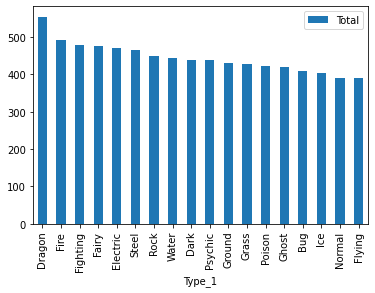

In [22]:
# Memvisualisasikan pokemon dualtype berdasar type 1 nya
Type2.plot(kind = 'bar', y = 'Total',use_index = True)

#### Diketahui jenis tipe 1 pokemon yang terkuat dari pokemon dual type adalah dragon

# Tahap 2 : Mulai Build Team Pokemon berdasar hasil Research

### Step 1 :Assign 1 pokemon Legendary di setiap Team dari yang terkuat ke empat sampai yang paling kuat

In [39]:
# Mencari Pokemon Legendary yang terkuat
Legendaries = df.query("Legendary == True").sort_values(by = 'Total', ascending = False).reset_index().drop('index', axis=1)
Legendaries

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Banyak_Jenis
0,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Two
1,MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,True,One
2,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,Two
3,KyogrePrimal Kyogre,Water,None,770,100,150,90,180,160,90,3,True,One
4,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,Two
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,Two
61,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True,Two
62,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True,Two
63,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True,Two


In [24]:
# Mempersiapkan List kosong untuk team pokemon

Team = []

In [25]:
# Mempersiapkan Nmaa kolom untuk dimasukkan kedalam list team pokemon
a = list(df.columns)

In [26]:
# Memasukan karakter legendary dengan total tertinggi menggunakan iloc
Team.append(Legendaries.iloc[[0]])

###  Step 2 : Mencari pokemon terkuat

In [27]:
df_twotype_nolegend = df_twotype_nolegend.sort_values(by = 'Total', ascending = False)
df_twotype_nolegend

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Banyak_Jenis
125,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False,Two
196,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False,Two
234,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False,Two
200,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False,Two
65,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False,Two
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False,Two
9,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False,Two
145,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False,Two
8,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False,Two


In [28]:
# Membandingkan Total dari pokemon 2 type terkuat dan 1 type terkuat
df_onetype_nolegend = df_onetype_nolegend.sort_values(by = 'Total', ascending = False)
df_onetype_nolegend

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Banyak_Jenis
150,Slaking,Normal,None,670,150,160,100,95,65,100,3,False,One
159,AggronMega Aggron,Steel,None,630,70,140,230,60,80,50,3,False,One
5,BlastoiseMega Blastoise,Water,None,630,79,103,120,135,115,78,1,False,One
85,Mew,Psychic,None,600,100,100,100,100,100,100,1,False,One
358,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Feebas,Water,None,200,20,15,20,10,55,80,3,False,One
143,Wurmple,Bug,None,195,45,45,35,20,30,20,3,False,One
6,Caterpie,Bug,None,195,45,30,35,20,20,45,1,False,One
208,Kricketot,Bug,None,194,37,25,41,25,41,25,4,False,One


Dari data yang dihasilkan, pokemon dual type memiliki 4 pokemon dengan type 700 sebelum akhirnya turun menjadi 640 dan pokemon yang memiliki 1 type terkuat adalah slaking dengan total 670, maka 4 dari pokemon terkuat dual type dan 1 dari pokemon terkuat single type akan menjadi pelengkap team ini.

In [29]:
Team

[                  Name   Type_1    Type_2  Total   HP  Attack  Defense  \
 0  MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   
 
    Sp. Atk  Sp. Def  Speed  Generation  Legendary Banyak_Jenis  
 0      154      100    130           1       True          Two  ]

In [30]:
# Mengecheck shape dari team dan reshape menjadi 2 diemnsi agar dapat di ubah jadi pandas dataframe
np.shape(Team)
Team
Team = np.array(Team)
Team = Team.reshape(1,13)
Team = pd.DataFrame(Team, columns = a)
Team

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Banyak_Jenis
0,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Two


In [31]:
# Mengambil 4 pokeom terkuat dari dual type dan 1 pokemon terkuat single type
strong1 = df_twotype_nolegend.iloc[0:4]
strong2 = df_onetype_nolegend.iloc[0:1]

In [32]:
# Menggabungkan pokemon terkuat dari dual type dan single type kedalam team
Team = pd.concat([Team,strong1,strong2])
Team

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Banyak_Jenis
0,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Two
125,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False,Two
196,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False,Two
234,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False,Two
200,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False,Two
150,Slaking,Normal,None,670,150,160,100,95,65,100,3,False,One


In [33]:
# Me reset index agar lebih enak dilihat
Team.reset_index(inplace = True, drop = True)
Team

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Banyak_Jenis
0,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Two
1,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False,Two
2,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False,Two
3,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False,Two
4,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False,Two
5,Slaking,Normal,None,670,150,160,100,95,65,100,3,False,One


In [34]:
# Melihat jenis data 
Team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          6 non-null      object
 1   Type_1        6 non-null      object
 2   Type_2        6 non-null      object
 3   Total         6 non-null      object
 4   HP            6 non-null      object
 5   Attack        6 non-null      object
 6   Defense       6 non-null      object
 7   Sp. Atk       6 non-null      object
 8   Sp. Def       6 non-null      object
 9   Speed         6 non-null      object
 10  Generation    6 non-null      object
 11  Legendary     6 non-null      object
 12  Banyak_Jenis  6 non-null      object
dtypes: object(13)
memory usage: 752.0+ bytes


In [35]:
# Mengubah jenis data agar dapat divisualisasikan
Team[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']] = Team[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].astype('int64')

In [36]:
# Menggroupkan dataset berdasar nama
Tim = Team.groupby(by = 'Name').sum()
Tim = Tim.sort_values(by = 'Total', ascending = False)

<AxesSubplot:xlabel='Name'>

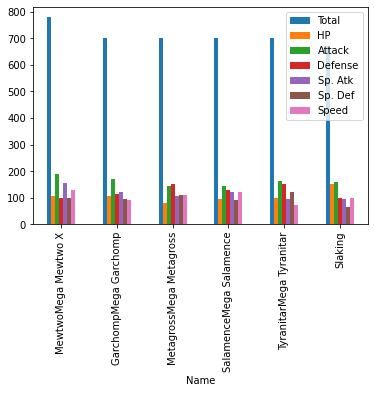

In [37]:
# Memvisualisasikan data
Tim.plot(kind = 'bar')

## Conclusions, Assumptions, Overall Analysis

Berdasar hasil penelitian sederhana ini terdapat beberapa poin yang ditemukan dari hasil penelitian
1. pokemon yang memiliki dua tipe memiliki rata2 total yang lebih banyak yang menandakan base stats mereka lebih baik dibanding pokemon yang hanya memiliki satu tipe
2. pokemon legendary lebih kuat sekitar 30% dibanding pokemon biasa
3. Jenis pokemon yang memiliki rata-rata yang tinggi untuk satu type adalah steel dan utk dual type adalah dragon, terbukti untuk dragon, karena di dalam komposisi team ini terdapat 2 pokemon berjenis dragon